# Description

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas
You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards
You need to identify the best possible model that will give the required performance
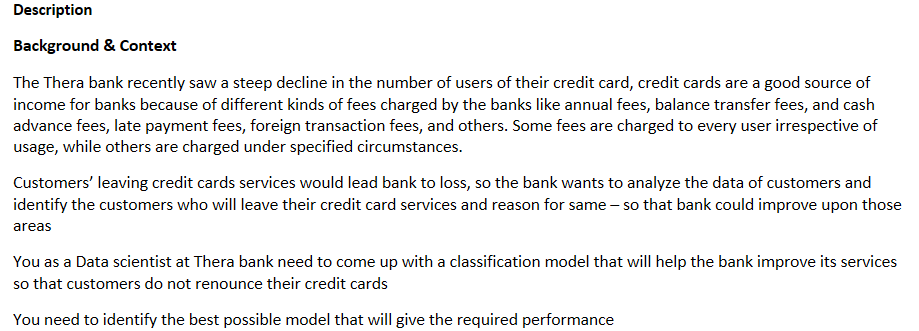

### Data Description
	• CLIENTNUM: Client number. Unique identifier for the customer holding the account
	• Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
	• Customer_Age: Age in Years
	• Gender: Gender of the account holder
	• Dependent_count: Number of dependents
	• Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
	• Marital_Status: Marital Status of the account holder
	• Income_Category: Annual Income Category of the account holder
	• Card_Category: Type of Card
	• Months_on_book: Period of relationship with the bank
	• Total_Relationship_Count: Total no. of products held by the customer
	• Months_Inactive_12_mon: No. of months inactive in the last 12 months
	• Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
	• Credit_Limit: Credit Limit on the Credit Card
	• Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
	• Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
	• Total_Trans_Amt: Total Transaction Amount (Last 12 months)
	• Total_Trans_Ct: Total Transaction Count (Last 12 months)
	• Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
	• Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
	• Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# To impute missing values
from sklearn.impute import SimpleImputer


# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")
%autosave 15
# This will help in making the Python code more structured automatically (good coding practice)
## %load_ext nb_black

Autosaving every 15 seconds


### Loading Data

In [2]:
job = pd.read_csv("BankChurners.csv")

In [221]:
# Checking the number of rows and columns in the data
job.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns 

### Data Overview

In [4]:
# let's create a copy of the data
df = job.copy()

In [5]:
# let's view the first 5 rows of the data
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [6]:
# let's view the last 5 rows of the data
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [7]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Only 4 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [9]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

* `Education_Level` column has 15% missing values out of the total observations.
* `Marital_Status` column has 7.4% missing values out of the total observations.
* We will impute these values after we split the data into train, validation and test sets.

In [10]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

**Observations**
* `CLIENTNUM:` CLIENTNUM being a unique identifier doesn't add any meaning to the analysis and can be dropped.

In [11]:
# list of all categorical variables
cat_col = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category','Dependent_count','Total_Relationship_Count']

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838


* Adding Total_Relationship_Count &  Dependent_count categorical as they need absolute value  and can be used for inferening churn of the customer.

In [12]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Observations**
* Most of the records are from city_103.


## Data Pre-Processing

In [13]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    df[column]=df[column].astype('category')

In [14]:
# CLIENTNUM is unique for each candidate and might not add value to modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

In [15]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Modify the Target variable to Numeric ##
###### Function to convert "Existing Customer" to 1  and "Attrited Customer" to 0 

In [16]:
def Attrition_Flag_conv(x):
    if x == "Existing Customer":
          return 0
    elif x == "Attrited Customer":
        return 1
    else:
        return x

In [17]:
df["Attrition_Flag"] = df["Attrition_Flag"].apply(Attrition_Flag_conv)


In [18]:
df.head()

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
0              0            45      M               3     High School   
1              0            49      F               5        Graduate   
2              0            51      M               3        Graduate   
3              0            40      F               4     High School   
4              0            40      M               3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                        5                       1                      3   
1                        6                       1                      2   
2                        4                       1                      0   
3                        3                       4                      1   
4                        5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [19]:
# filtering object type columns
cat_columns = df.describe(include=["category"]).columns
cat_columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count'],
      dtype='object')

In [20]:
# filtering continous type columns
cont_columns = df.describe(include=["float64","int64"]).columns
cont_columns

Index(['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## EDA

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Customer_Age

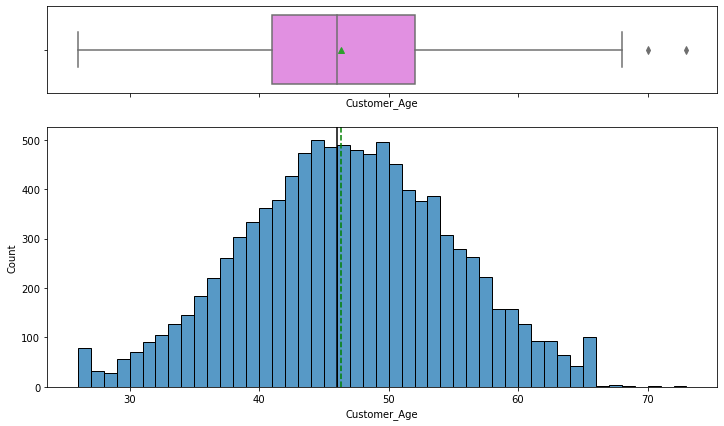

In [22]:
histogram_boxplot(df, "Customer_Age")

* Distribution of Customer_Age is normallly distributed.

### Observations on Months_Inactive_12_mon

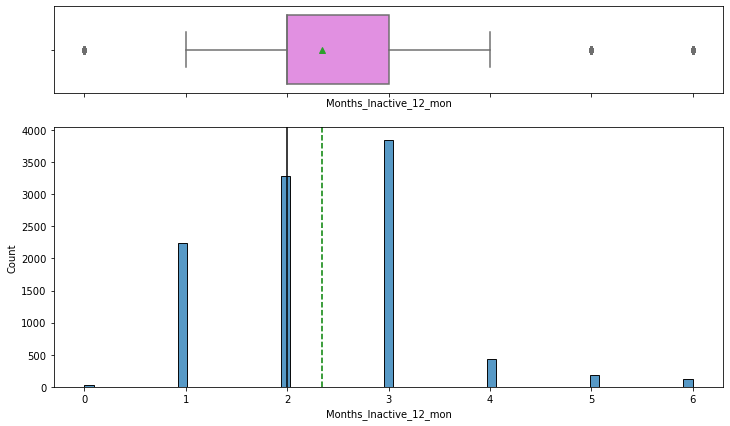

In [23]:
histogram_boxplot(df, "Months_Inactive_12_mon")

* From the histogram distribution count of 2 & 3 has the highest with customer count of 300+ 

### Observation on Months of Book 

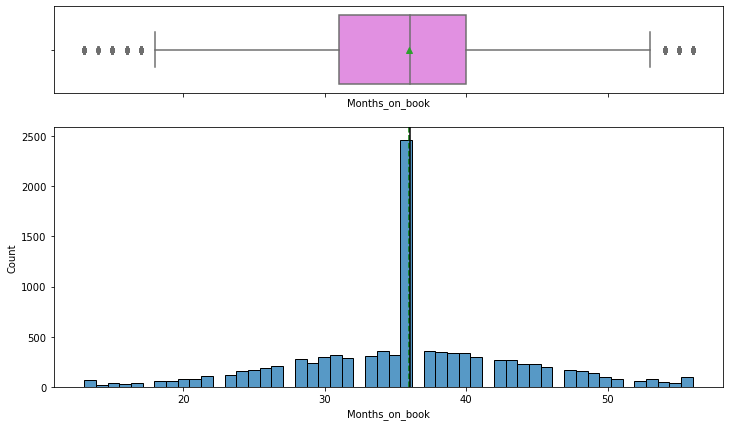

In [24]:
histogram_boxplot(df, "Months_on_book") 

* Distribution of Customer_Age is normallly distributed.
* Between 35-36 months  is the highest and most comonly found customers with 2000+ counts

### Observation on Contacts_Count_12_mon

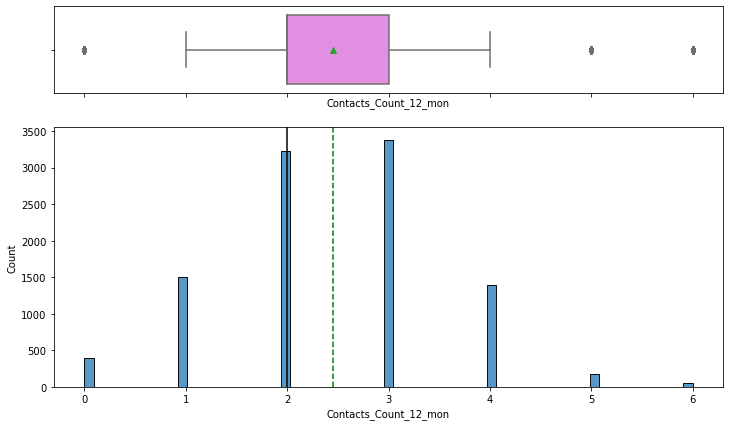

In [25]:
histogram_boxplot(df, "Contacts_Count_12_mon") 

* Most Customers have 2 & 3 Contacts_Count_12_mon 

### Observation on Credit_Limit

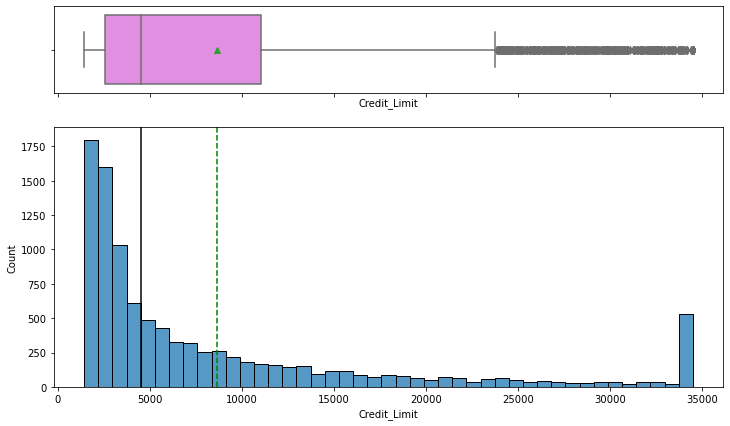

In [26]:
histogram_boxplot(df, "Credit_Limit") 

* The distribution is Right skwwed with few outliers with over 30000 credit limit 

### Observation on Total_Revolving_Bal

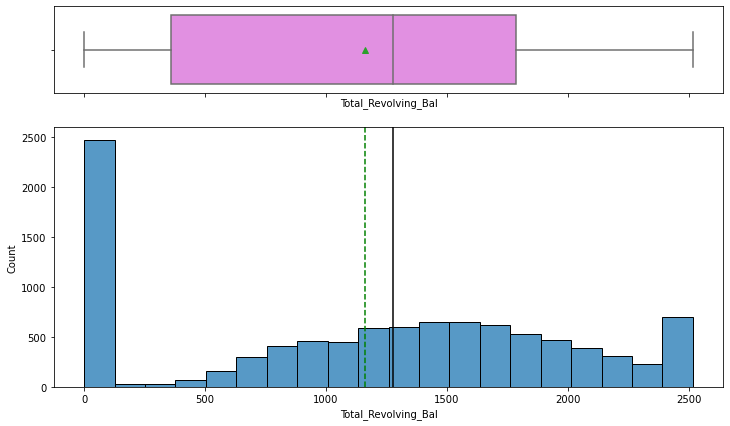

In [27]:
histogram_boxplot(df, "Total_Revolving_Bal") 

### Observation on Total_Revolving_Bal

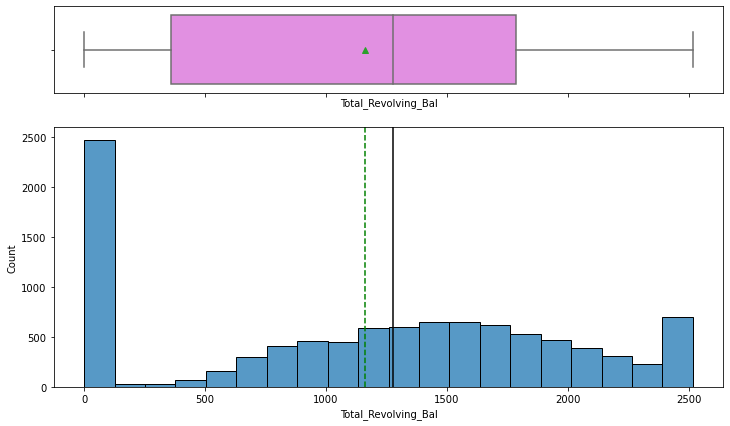

In [28]:
histogram_boxplot(df, "Total_Revolving_Bal") 

### Observation on Avg_Open_To_Buy

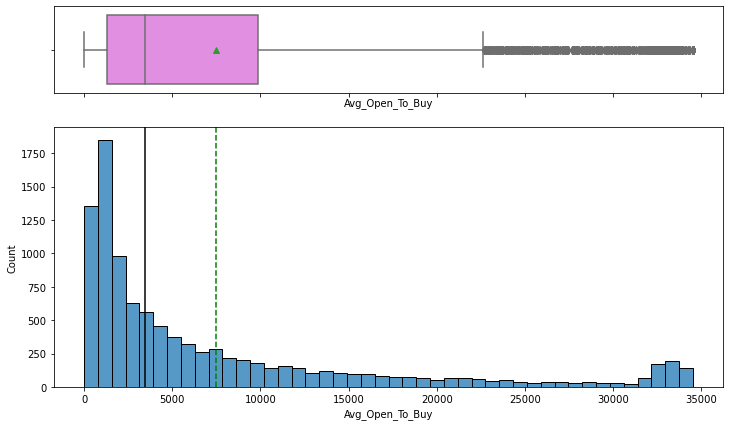

In [29]:
histogram_boxplot(df, "Avg_Open_To_Buy") 

* The Avg_Open_To_Buy distribution is Right skwwed with few outliers with over 30000 credit limit 

### Observation on Total_Trans_Amt

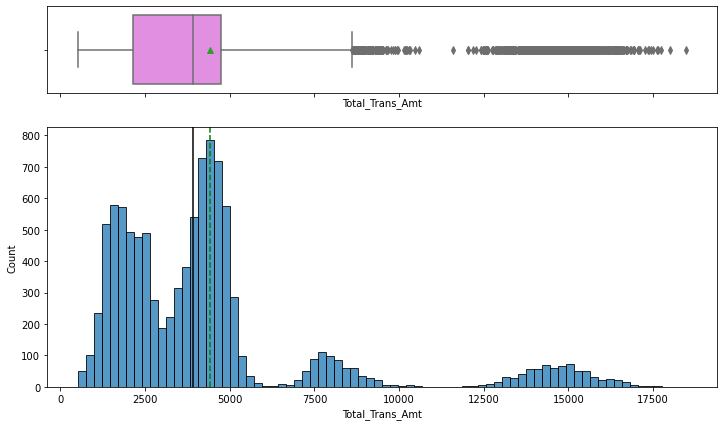

In [30]:
histogram_boxplot(df, "Total_Trans_Amt") 

* The Total_Trans_Amt distribution is has many outliers beyound 7500.We will keep the ouliers to check for variance on this feature

### Observation on Total_Trans_Ct

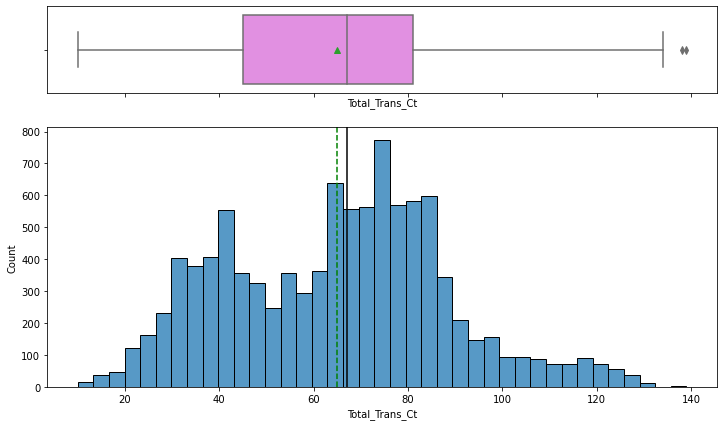

In [31]:
histogram_boxplot(df, "Total_Trans_Ct") 

* The Total_Trans_Ct distribution has a LEFT skewed disctribution.

### Observation on Avg_Utilization_Ratio

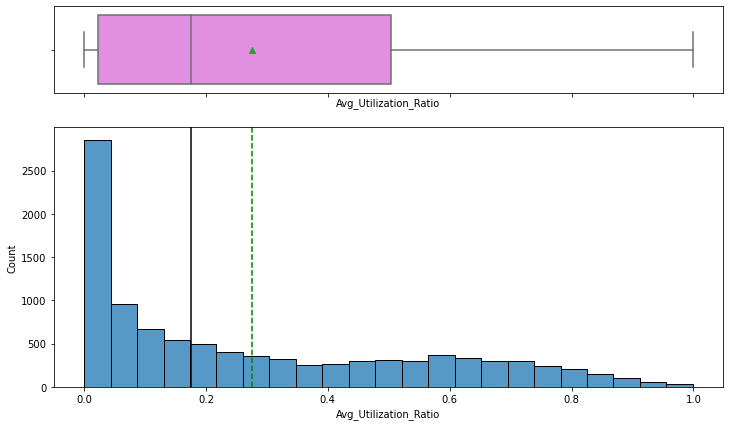

In [32]:
histogram_boxplot(df, "Avg_Utilization_Ratio") 

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on gender

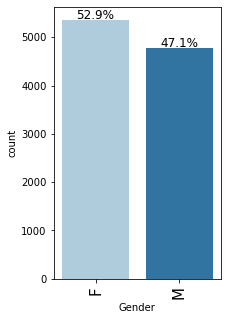

In [34]:
labeled_barplot(df, "Gender",perc=True)

* 53% of the customers are females.

### Observations on Dependent_count

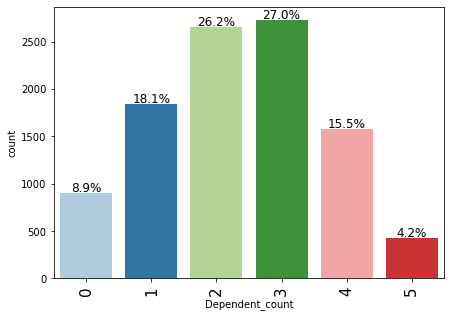

In [35]:
labeled_barplot(df, "Dependent_count",perc=True)

* Dependent Count 3 is the highest followed by 2,1 & 4 amoung customers.

### Observations on Education_Level

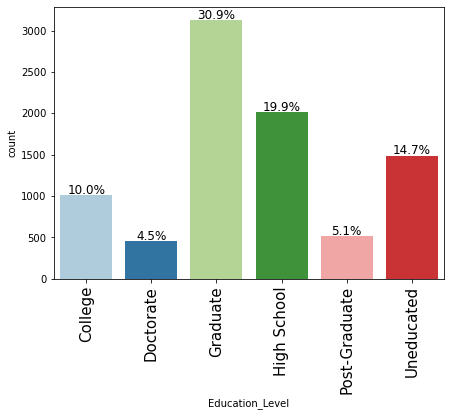

In [36]:
labeled_barplot(df, "Education_Level",perc=True)

* 30.9% of the customers are graduates followed by 19.9% with high school and 10% with some college  education.

### Observations on Marital_Status

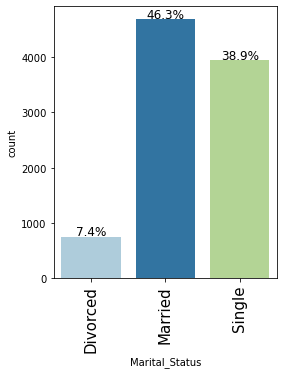

In [37]:
labeled_barplot(df, "Marital_Status",perc=True)

* 46.3% of the customes are married ,followed by 38.9% Single.

### Observations on Income_Category

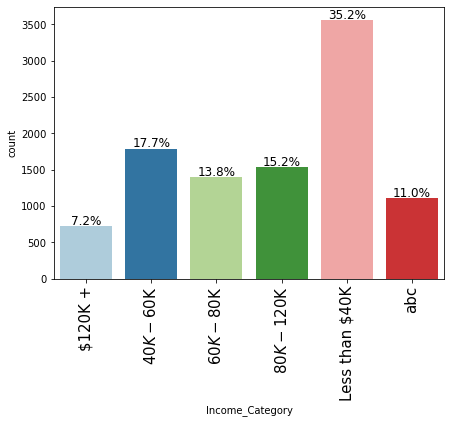

In [38]:
labeled_barplot(df, "Income_Category",perc=True)

* Less than 40K has the highest  with 35.2% of customers followed by 17.7% for 40K-60K.

### Observations on Card_Category

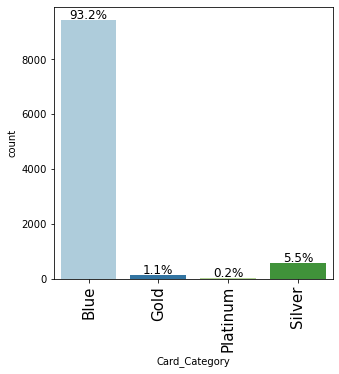

In [39]:
labeled_barplot(df, "Card_Category",perc=True)

* 93.2% of the customers have Blue category.

### Observations on Total_Relationship_Count

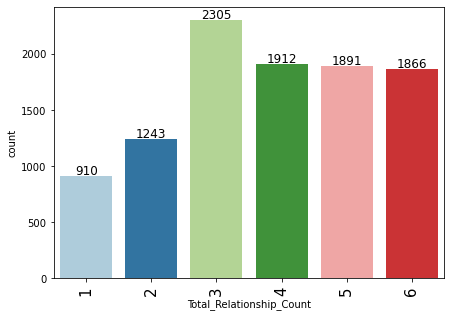

In [40]:
labeled_barplot(df, "Total_Relationship_Count")

## Bivariate Analysis

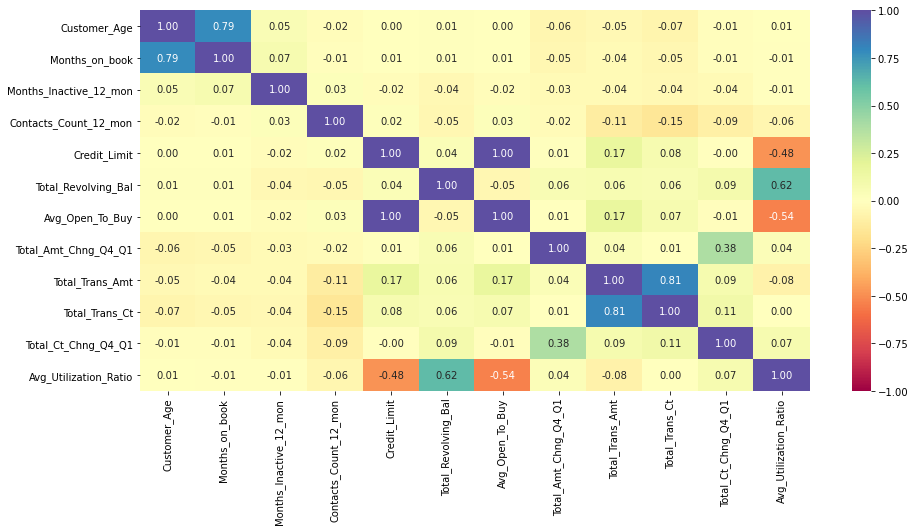

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is strong correlation between Months_on_book & Customer Age
* There is strong correlation between Average_Utilization_Ratio &Total Revolving Balancee
* Credit limit  has a negative relation with  Average Utilization Ratio variable 
* Variable Average Utilization Ratio has a negative /inverse relationship with Avg_Open_To_Buy variable 

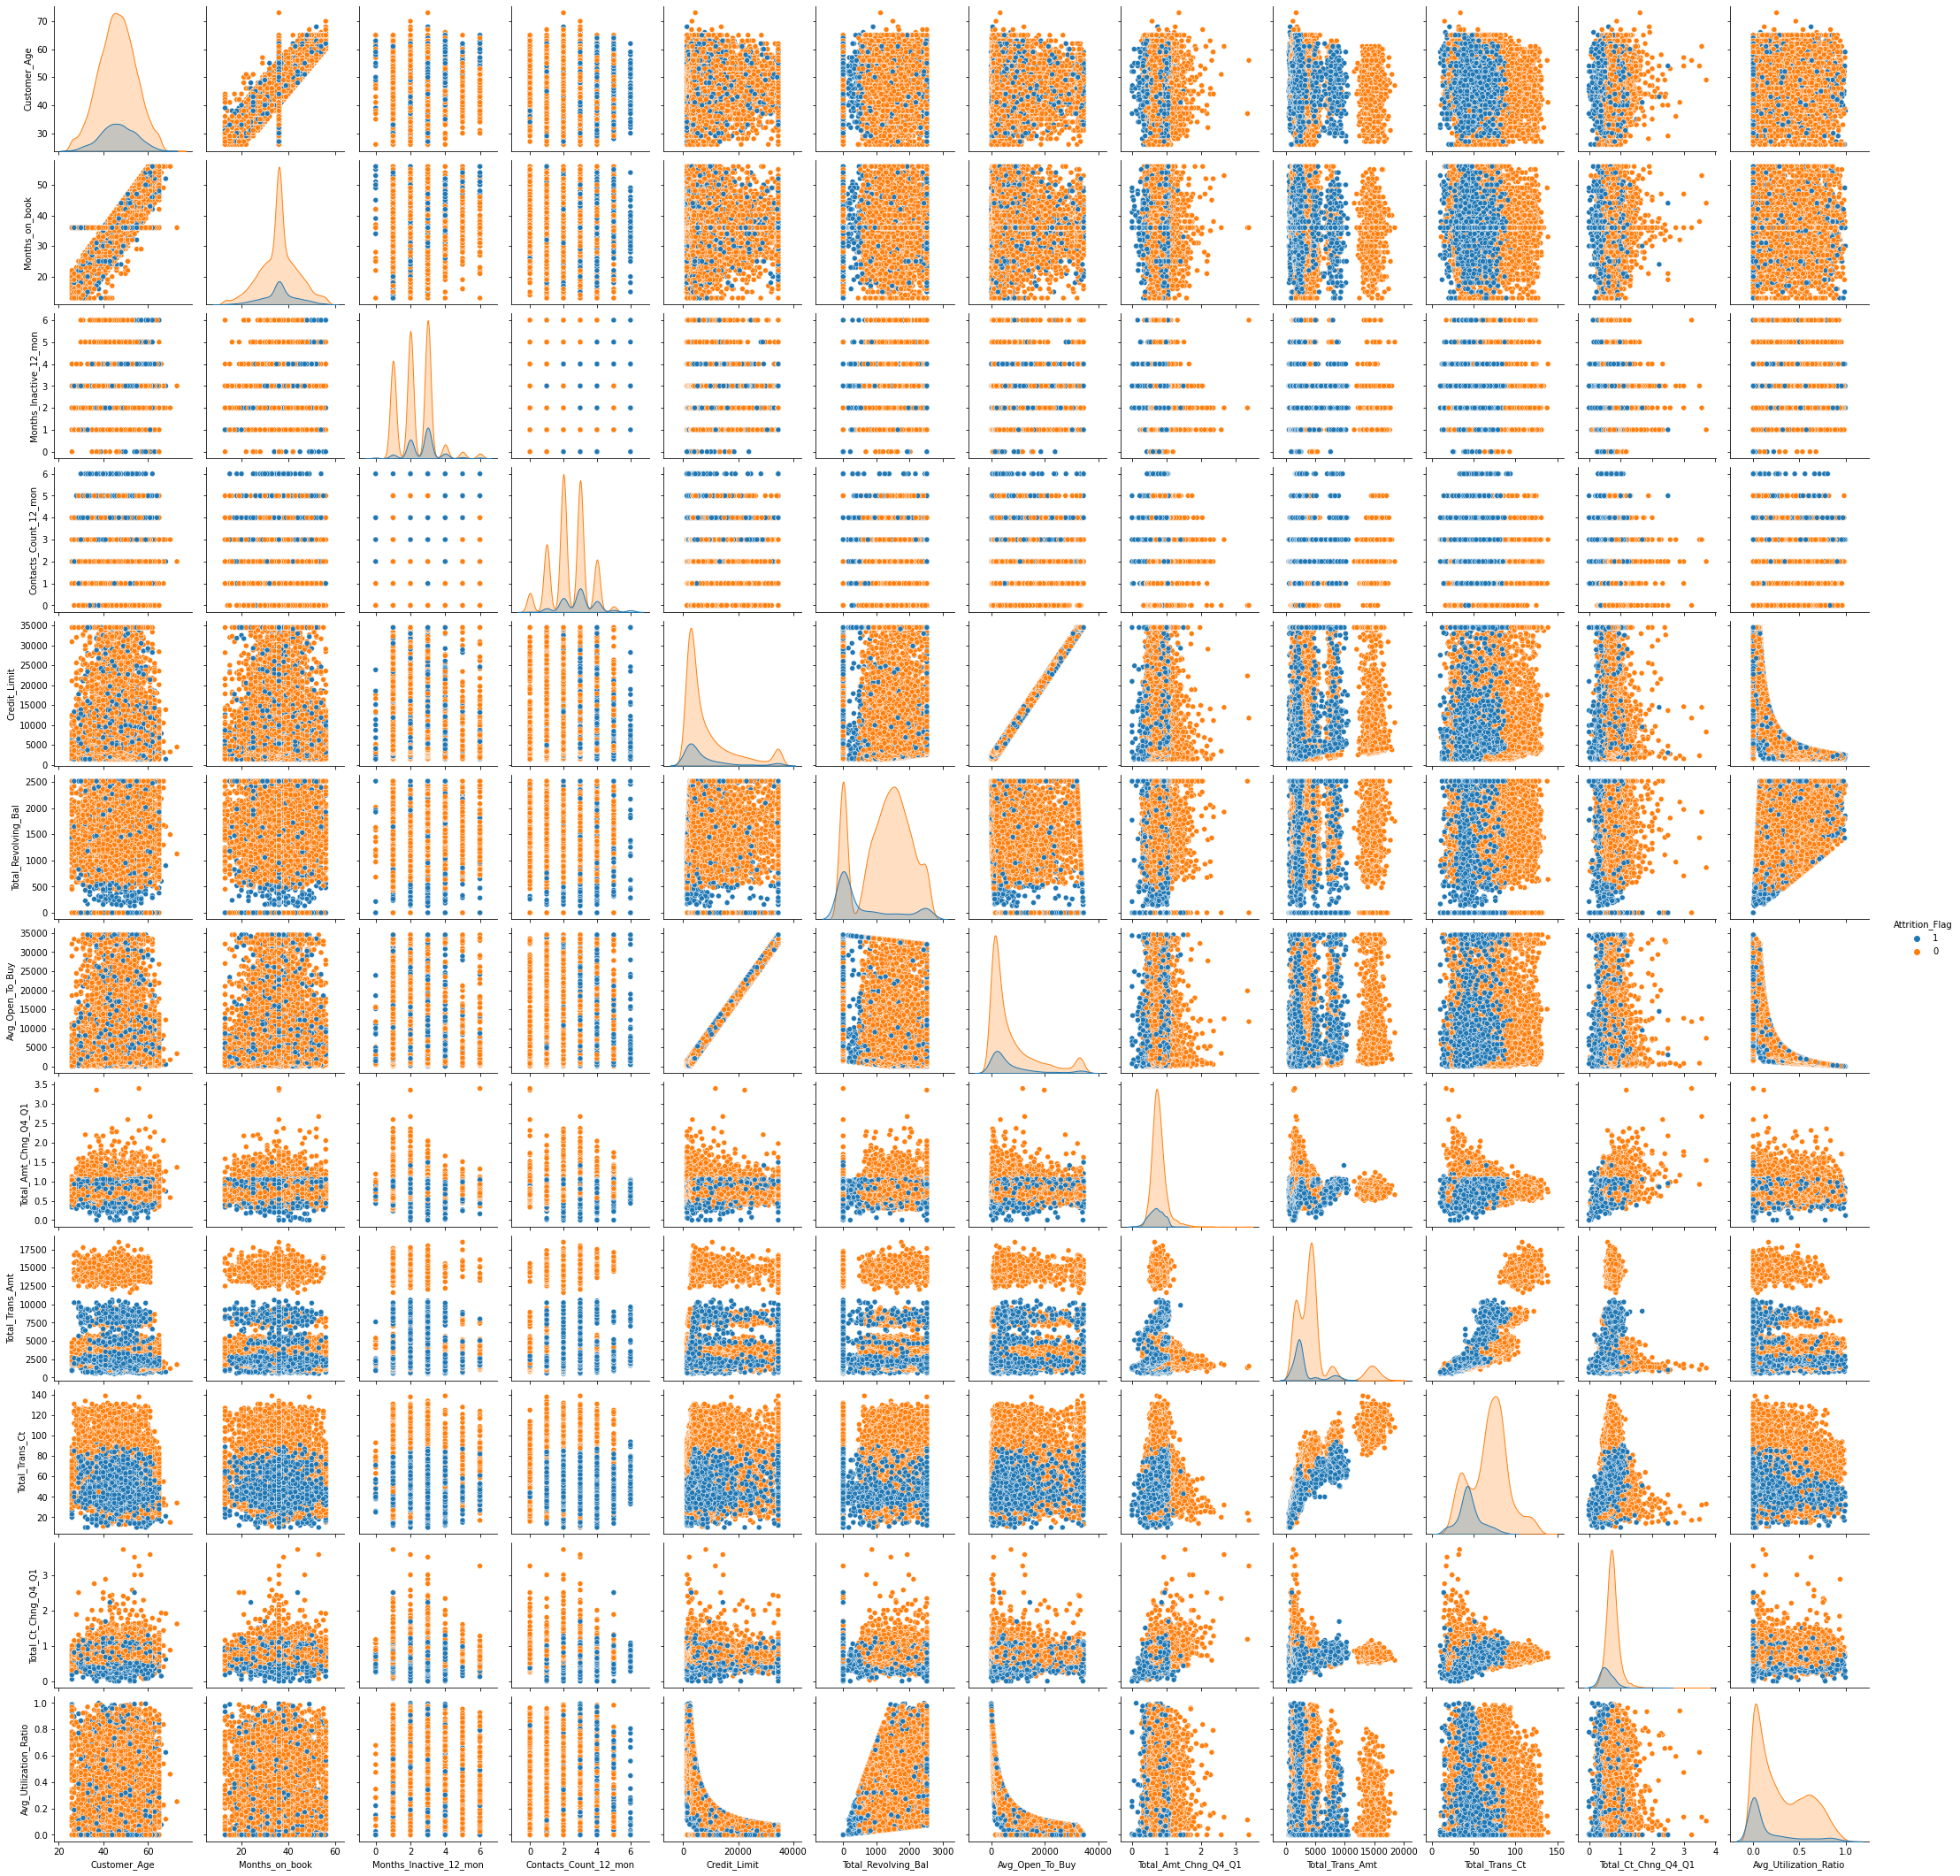

In [132]:
sns.pairplot(data=df, hue="Attrition_Flag")
plt.show()

In [45]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Attrition_Flag vs Income_Category

Attrition_Flag      1     0    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
abc               187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


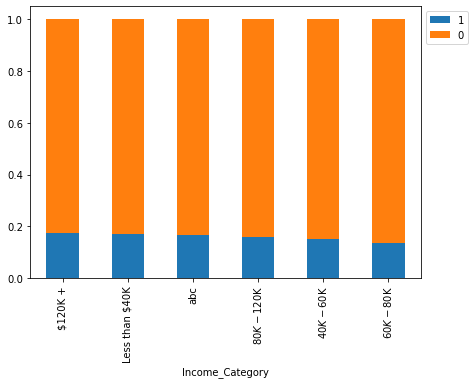

In [46]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

* Income Range less than 40K has the highest number of Customers and Attrition customers followed by 40K-60k range
* Income Range 120K has the lowest number of Customers and Attrition customers

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               1     0    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


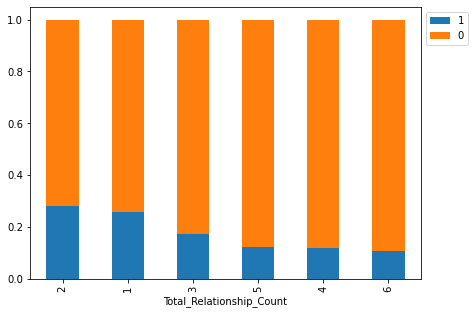

In [48]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

### Attrition_Flag vs Months_on_book

Attrition_Flag     1     0    All
Months_on_book                   
All             1627  8500  10127
36               430  2033   2463
39                64   277    341
37                62   296    358
30                58   242    300
38                57   290    347
34                57   296    353
41                51   246    297
33                48   257    305
40                45   288    333
35                45   272    317
32                44   245    289
28                43   232    275
44                42   188    230
43                42   231    273
46                36   161    197
42                36   235    271
29                34   207    241
31                34   284    318
45                33   194    227
25                31   134    165
24                28   132    160
48                27   135    162
50                25    71     96
49                24   117    141
26                24   162    186
47                24   147    171
27            

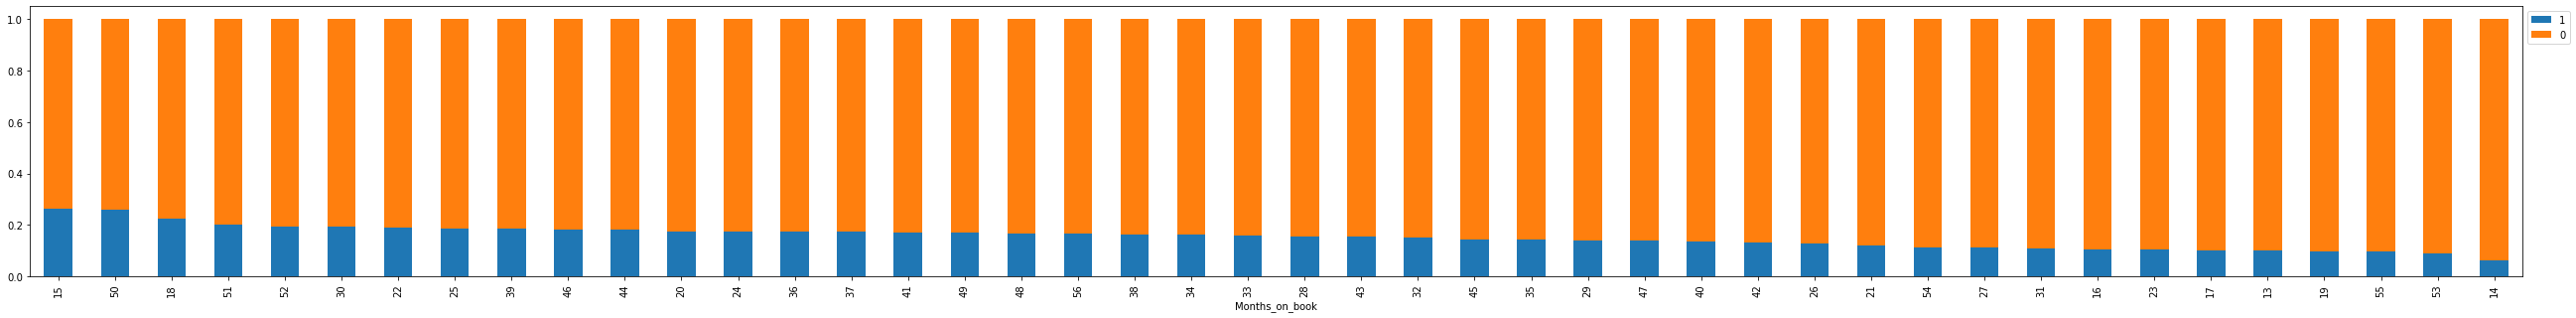

In [49]:
stacked_barplot(df, "Months_on_book", "Attrition_Flag")

In [50]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Attrition_Flag vs Customer_Age

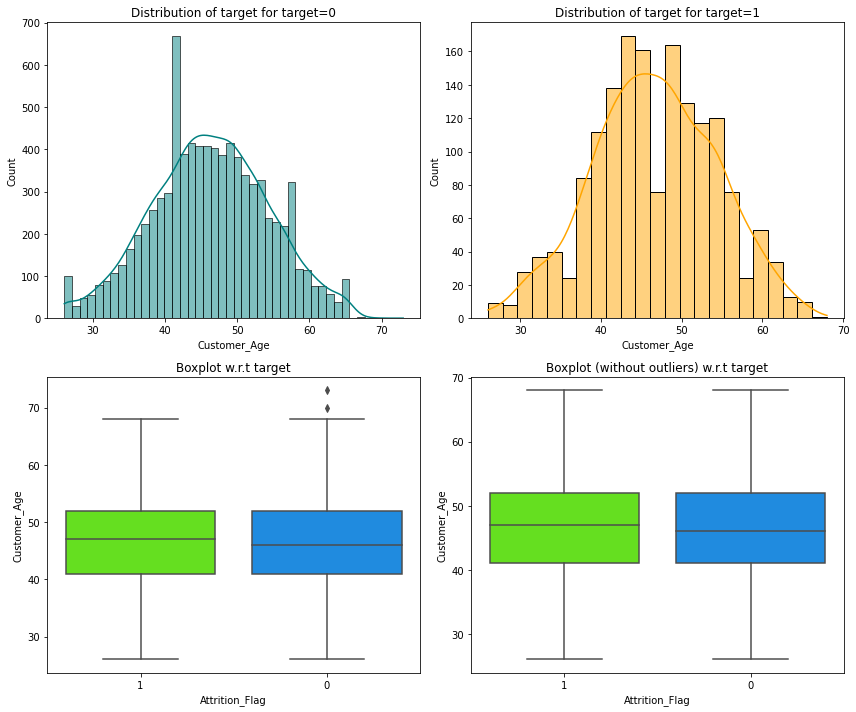

In [51]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

### Attrition_Flag vs Avg_Open_To_Buy

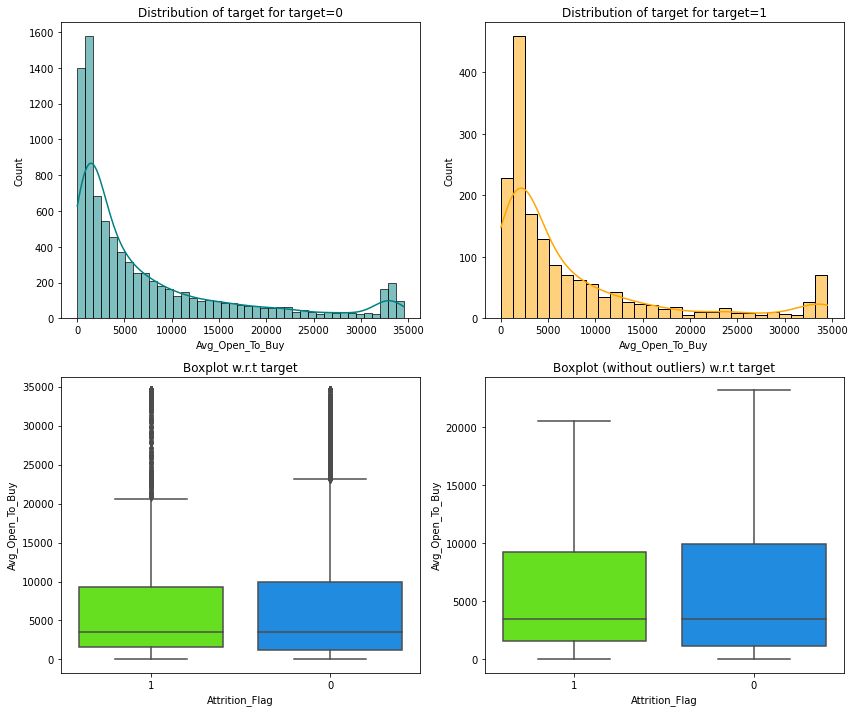

In [52]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

In [53]:
## Copy the datframe for mmodelling 
data1=df.copy()

In [ ]:
##data1["Attrition_Flag"].replace(1, "yes", inplace=True)
##data1["Attrition_Flag"].replace(0, "no", inplace=True)

### Data Preparation for Modeling

In [54]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [55]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [56]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [57]:
X_train.shape,X_val.shape , X_test.shape
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6075, 19)
Shape of Validation set :  (2026, 19)
Shape of Test set :  (2026, 19)
Percentage of classes in training set:
0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64


**Imputing Missing Values**

In [58]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['Education_Level','Marital_Status']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Fit and transform the val data
X_val[mode_imputed_col]=si2.fit_transform(X_val[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [59]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.


### Creating Dummy Variables

In [60]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 38) (2026, 38) (2026, 38)


* After encoding there are 38 columns.

In [61]:
X_train.columns

Index(['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Dependent_count_1', 'Dependent_count_2',
       'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_abc',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Total_Relationship_Count_2', 'Total_Relationship_Count_3',
       'Total_Relationship_Count_4', 'Total_Rela

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
 Problem Statement :  Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.
1. Predicting an customer who can leave(Attrited)can be wrong.This will be loss for the Credit Card company.
#### Which case is more important? 
* Predicting an customer who will not leave, but have been predicted to leave.Minimizing false negetive will reult in targetting customers whoc will potentially not leave. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

#### We are building the following models 
 a) logistic regression without tuning 
 b) decision tree without tuning
 c) bagging using base estimator of decision tree without tuning 
 d) random forest classifier without tuning 
 e) Adaboost without tuning 
 f) Gradient boost without tuning.  


In [62]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression 

In [64]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

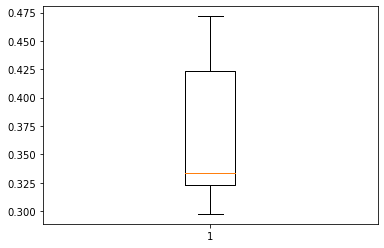

In [65]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.325 to 0.425 recall.
* Let's check the performance on validation data.

In [66]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.869465  0.410861   0.647819  0.502821

In [67]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.880059  0.47546   0.682819  0.560579

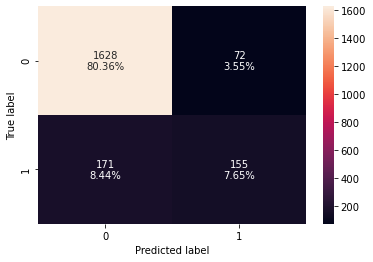

In [68]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very high

### Oversampling train data using SMOTE

In [69]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 38)
After Oversampling, the shape of train_y: (10198,) 



### Logistic Regression on oversampled data

In [70]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

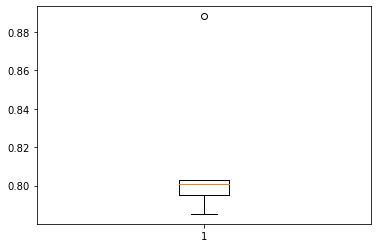

In [71]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set is over .82, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [216]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.788586  0.794666   0.785119  0.789864

In [217]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.791708  0.788344   0.421311  0.549145

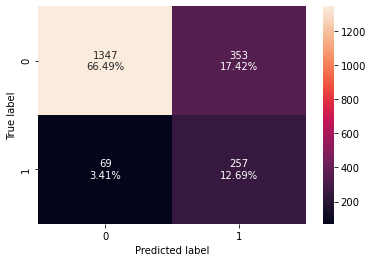

In [74]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

* Performance on the training set improved greatly but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [75]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [76]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



### Logistic Regression on undersampled data

In [77]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

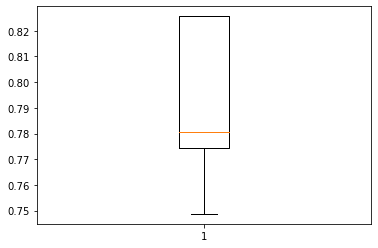

In [78]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.78 to 0.82, which is close  from the initial trainign  model(without oversampling)
* Let's check the performance on the validation set.

In [79]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.801742  0.840164   0.780209  0.809077

In [80]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.779368  0.852761   0.410635  0.554337

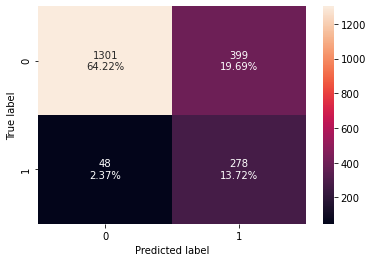

In [82]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model is over fitting as the validation F1 score is very low but the recall is close
* Model performance has improved using undersampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression with oversampled data  \
Accuracy              0.869465                                   0.788586   
Recall                0.410861                                   0.794666   
Precision             0.647819                                   0.785119   
F1                    0.502821                                   0.789864   

           Logistic Regression with undersampled data  
Accuracy                                     0.801742  
Recall                                       0.840164  
Precision                                    0.780209  
F1                                           0.809077

In [84]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Logistic Regression  Logistic Regression with oversampled data  \
Accuracy              0.880059                                   0.791708   
Recall                0.475460                                   0.788344   
Precision             0.682819                                   0.421311   
F1                    0.560579                                   0.549145   

           Logistic Regression with undersampled data  
Accuracy                                     0.779368  
Recall                                       0.852761  
Precision                                    0.410635  
F1                                           0.554337

* Logistic regression model on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [85]:
# Calculating different metrics on validation set
log_reg_under_test_perf = model_performance_classification_sklearn(
    log_reg_under, X_test, y_test
)
print("Test performance:")
log_reg_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.752221  0.852308   0.378933  0.524621

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set

### Finding the coefficients

In [86]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(log_reg_under.coef_, log_reg_under.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
Coefficients      0.105069       -0.034905                0.219537   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Coefficients                0.31035     -0.000272             -0.00054   

              Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Coefficients         0.000269              0.002063         0.000301   

              Total_Trans_Ct  ...  Income_Category_abc  Card_Category_Gold  \
Coefficients       -0.092826  ...               0.0032            0.004284   

              Card_Category_Platinum  Card_Category_Silver  \
Coefficients                0.001413              0.004283   

              Total_Relationship_Count_2  Total_Relationship_Count_3  \
Coefficients                    0.042563                    0.007013   

              Total_Relationship_Count_4  Total_Relationship_Count_5  \
Coefficients                   -0.009112                    -0.00864   

              Total_Relationship_Count_6  Intercept  
Coefficients                   -0.019347   0.045136  

[1 rows x 39 columns]

### Coefficient interpretations

* Coefficient of gender_Other, relevent_experience_No relevant experience, company_type_Other, last_new_job_2, etc are positive, increase in these will lead to an increase in chances of a person looking for a job change
* Coefficient of city_development_index, training_hours, city_Developing, city_Developing, etc are negative increase in these will lead to a decrease in chances of a person not looking for a job change

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [87]:
odds = np.exp(log_reg_under.coef_[0])  # converting coefficients to odds
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    odds, X_train.columns, columns=["odds"]
).T  # adding the odds to a dataframe

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
odds      1.110787        0.965697                  1.2455   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
odds               1.363902      0.999728              0.99946   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
odds         1.000269              1.002065         1.000301        0.911352   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
odds             0.966682               1.009392  0.971185           0.984222   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
odds           1.000419           1.048133           1.011963   

      Dependent_count_5  Education_Level_Doctorate  Education_Level_Graduate  \
odds           1.013569                   1.003701                  1.026212   

      Education_Level_High School  Education_Level_Post-Graduate  \
odds                     0.994918                       1.009064   

      Education_Level_Uneducated  Marital_Status_Married  \
odds                     1.00085                1.007039   

      Marital_Status_Single  Income_Category_$40K - $60K  \
odds               1.028776                     1.010092   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
odds                     0.984355                      1.005056   

      Income_Category_Less than $40K  Income_Category_abc  Card_Category_Gold  \
odds                        1.048983             1.003205            1.004293   

      Card_Category_Platinum  Card_Category_Silver  \
odds                1.001414              1.004292   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
odds                    1.043482                    1.007038   

      Total_Relationship_Count_4  Total_Relationship_Count_5  \
odds                    0.990929                    0.991397   

      Total_Relationship_Count_6  
odds                    0.980839

* Percentage change in odds

In [88]:
perc_change_odds = (
    np.exp(log_reg_under.coef_[0]) - 1
) * 100  # finding the percentage change
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    perc_change_odds, X_train.columns, columns=["change_odds%"]
).T  # adding the change_odds% to a dataframe

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
change_odds%     11.078717       -3.430252               24.549993   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
change_odds%              36.390241     -0.027165            -0.054031   

              Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
change_odds%         0.026881              0.206489         0.030061   

              Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
change_odds%       -8.864834            -3.331762               0.939233   

              Gender_M  Dependent_count_1  Dependent_count_2  \
change_odds% -2.881472          -1.577756            0.04193   

              Dependent_count_3  Dependent_count_4  Dependent_count_5  \
change_odds%           4.813273           1.196264           1.356879   

              Education_Level_Doctorate  Education_Level_Graduate  \
change_odds%                   0.370093                  2.621165   

              Education_Level_High School  Education_Level_Post-Graduate  \
change_odds%                    -0.508235                       0.906368   

              Education_Level_Uneducated  Marital_Status_Married  \
change_odds%                    0.084975                0.703891   

              Marital_Status_Single  Income_Category_$40K - $60K  \
change_odds%                2.87757                     1.009176   

              Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
change_odds%                    -1.564488                      0.505632   

              Income_Category_Less than $40K  Income_Category_abc  \
change_odds%                        4.898333             0.320518   

              Card_Category_Gold  Card_Category_Platinum  \
change_odds%            0.429313                0.141379   

              Card_Category_Silver  Total_Relationship_Count_2  \
change_odds%               0.42918                    4.348151   

              Total_Relationship_Count_3  Total_Relationship_Count_4  \
change_odds%                    0.703776                   -0.907062   

              Total_Relationship_Count_5  Total_Relationship_Count_6  
change_odds%                   -0.860301                    -1.91607

## Decision tree

In [89]:
#Fitting the Traiing model
d_tree = DecisionTreeClassifier(criterion = 'gini',random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

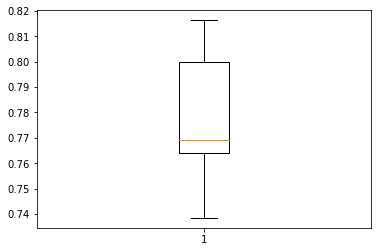

In [90]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=d_tree, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.76 to 0.81 recall.
* Let's check the performance on validation data.

In [91]:
# Calculating different metrics on train set
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:")
d_tree_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [92]:
# Calculating different metrics on validation set
d_tree_model_val_perf = model_performance_classification_sklearn(d_tree, X_val, y_val)
print("Validation performance:")
d_tree_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.937808  0.791411   0.816456  0.803738

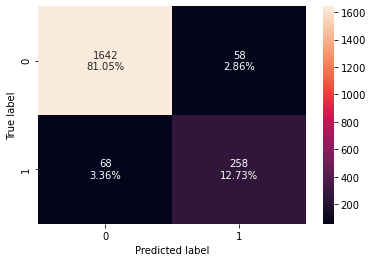

In [93]:
# creating confusion matrix
confusion_matrix_sklearn(d_tree, X_val, y_val)

* Decision Tree has NOT given a generalized performance on training and validation set.
* Model is over fitting 

### Decision  Tree on oversampled data

In [94]:
d_tree_over = DecisionTreeClassifier(criterion = 'gini',random_state=1)

# Training the basic Decision Tree  model with training set
d_tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

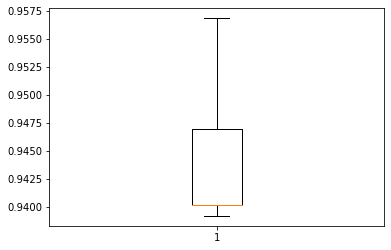

In [95]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=d_tree_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.94 to 0.9475, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [96]:
# Calculating different metrics on train set
d_tree_over_train_perf = model_performance_classification_sklearn(
    d_tree_over, X_train_over, y_train_over
)
print("Training performance:")
d_tree_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [97]:
# Calculating different metrics on validation set
d_tree_over_val_perf = model_performance_classification_sklearn(
    d_tree_over, X_val, y_val
)
print("validation performance:")
d_tree_over_val_perf

validation performance:


Accuracy    Recall  Precision       F1
0  0.932379  0.794479   0.787234  0.79084

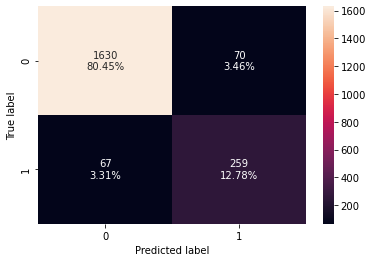

In [98]:
# creating confusion matrix
confusion_matrix_sklearn(d_tree_over, X_val, y_val)

* Perfrmance does not improve in validation copared to training. The models bet ween Training and Validation is over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [99]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [100]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



### Decision Tree on undersampled data

In [101]:
d_tree_under = DecisionTreeClassifier(criterion = 'gini',random_state=1)
d_tree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

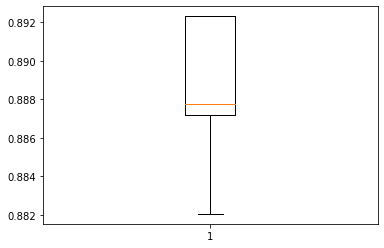

In [102]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=d_tree_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.88 to 0.892.
* Let's check the performance on the validation set.

In [103]:
# Calculating different metrics on train set
d_tree_under_train_perf = model_performance_classification_sklearn(
    d_tree_under, X_train_un, y_train_un
)
print("Training performance:")
d_tree_under_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [104]:
# Calculating different metrics on validation set
d_tree_under_val_perf = model_performance_classification_sklearn(
    d_tree_under, X_val, y_val
)
print("Validation performance:")
d_tree_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.891905  0.917178   0.608961  0.731946

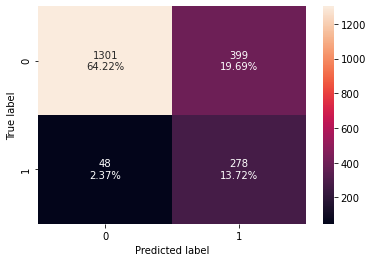

In [105]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model is close fit to the training with the higher recall score of less FN that Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [106]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        d_tree_over_train_perf.T,
        d_tree_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree with oversampled data  \
Accuracy             1.0                                  1.0   
Recall               1.0                                  1.0   
Precision            1.0                                  1.0   
F1                   1.0                                  1.0   

           Decision Tree with undersampled data  
Accuracy                                    1.0  
Recall                                      1.0  
Precision                                   1.0  
F1                                          1.0

In [107]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_val_perf.T,
        d_tree_over_val_perf.T,
        d_tree_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Decision Tree  Decision Tree with oversampled data  \
Accuracy        0.937808                             0.932379   
Recall          0.791411                             0.794479   
Precision       0.816456                             0.787234   
F1              0.803738                             0.790840   

           Decision Tree with undersampled data  
Accuracy                               0.891905  
Recall                                 0.917178  
Precision                              0.608961  
F1                                     0.731946

* D Tree model on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [108]:
# Calculating different metrics on validation set
d_tree_under_test_perf = model_performance_classification_sklearn(
    d_tree_under, X_test, y_test
)
print("Test performance:")
d_tree_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.877098  0.923077   0.572519  0.706714

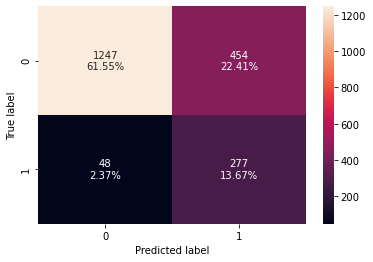

In [109]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set.The RECALL for Test and valudation are ver close and shows that it is generalizing well 

## Bagging Classifier

In [110]:
#Fitting the Traiing model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

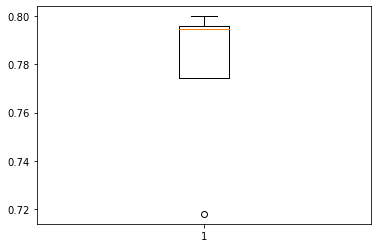

In [111]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.77 to 0.80 recall.
* Let's check the performance on validation data.

In [112]:
# Calculating different metrics on train set
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance:")
bagging_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.997366  0.987705   0.995868  0.99177

In [113]:
# Calculating different metrics on validation set
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance:")
bagging_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.953603  0.800613        0.9  0.847403

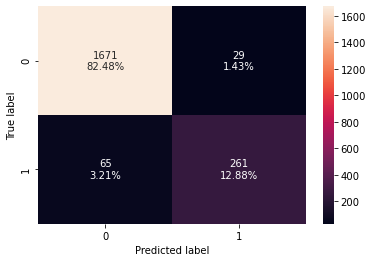

In [116]:
# creating confusion matrix
confusion_matrix_sklearn(bagging, X_val, y_val)

* Bagging has NOT given a generalized performance on training and validation set.
* Model is over fitting 

### Bagging Classifier on oversampled data

In [115]:
bagging_over = BaggingClassifier(random_state=1)

# Training the basic Decision Tree  model with training set
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

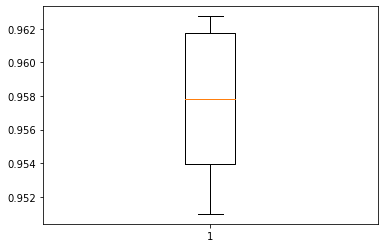

In [117]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.95 to 0.962, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [118]:
# Calculating different metrics on train set
bagging_over_train_perf = model_performance_classification_sklearn(
    bagging_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.997549  0.996862   0.998233  0.997547

In [119]:
# Calculating different metrics on validation set
bagging_over_val_perf = model_performance_classification_sklearn(
    bagging_over, X_val, y_val
)
print("validation performance:")
bagging_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.947187  0.843558   0.830816  0.837139

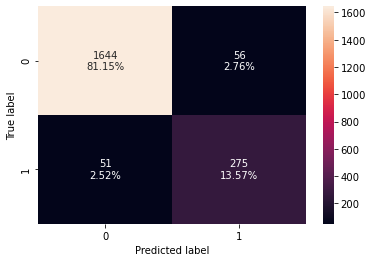

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_over, X_val, y_val)

* Perfrmance does not improve in validation compared to training. The models between Training and Validation is over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [121]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [122]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



###  Bagging Classifier on undersampled data

In [123]:
bagging_under = BaggingClassifier(random_state=1)
bagging_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

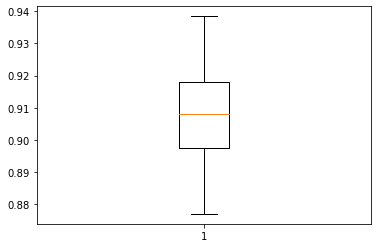

In [124]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=bagging_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.90 to 0.92.
* Let's check the performance on the validation set.

In [125]:
# Calculating different metrics on train set
bagging_under_train_perf = model_performance_classification_sklearn(
    bagging_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.994365  0.989754   0.998966  0.994339

In [126]:
# Calculating different metrics on validation set
bagging_under_val_perf = model_performance_classification_sklearn(
    bagging_under, X_val, y_val
)
print("Validation performance:")
bagging_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.923495  0.923313   0.698376  0.795244

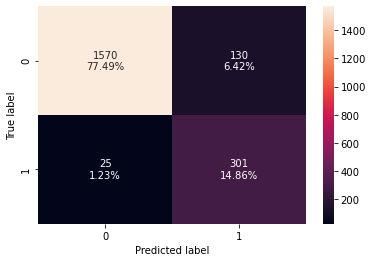

In [127]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_val, y_val)

* Model is a overfit to the training with a lower recall score of less FN than Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_model_train_perf.T,
        bagging_over_train_perf.T,
        bagging_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging Classifier  Bagging Classifier with oversampled data  \
Accuracy             0.997366                                  0.997549   
Recall               0.987705                                  0.996862   
Precision            0.995868                                  0.998233   
F1                   0.991770                                  0.997547   

           Bagging Classifier with undersampled data  
Accuracy                                    0.994365  
Recall                                      0.989754  
Precision                                   0.998966  
F1                                          0.994339

In [129]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_model_val_perf.T,
        bagging_over_val_perf.T,
        bagging_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
   "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Bagging Classifier  Bagging Classifier with oversampled data  \
Accuracy             0.953603                                  0.947187   
Recall               0.800613                                  0.843558   
Precision            0.900000                                  0.830816   
F1                   0.847403                                  0.837139   

           Bagging Classifier with undersampled data  
Accuracy                                    0.923495  
Recall                                      0.923313  
Precision                                   0.698376  
F1                                          0.795244

* Bagging Classifier on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [130]:
# Calculating different metrics on validation set
bagging_under_test_perf = model_performance_classification_sklearn(
    bagging_under, X_test, y_test
)
print("Test performance:")
bagging_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.913129  0.916923   0.666667  0.772021

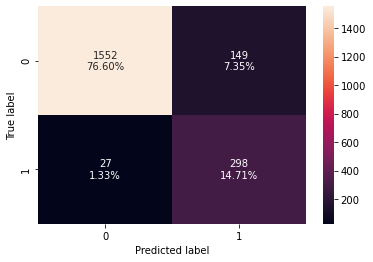

In [131]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set.The RECALL for Test and valudation are ver close and shows that it is generalizing well 

## Bagging Classifier

In [110]:
#Fitting the Traiing model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

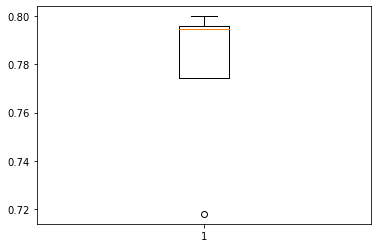

In [111]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.77 to 0.80 recall.
* Let's check the performance on validation data.

In [112]:
# Calculating different metrics on train set
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance:")
bagging_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.997366  0.987705   0.995868  0.99177

In [113]:
# Calculating different metrics on validation set
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance:")
bagging_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.953603  0.800613        0.9  0.847403

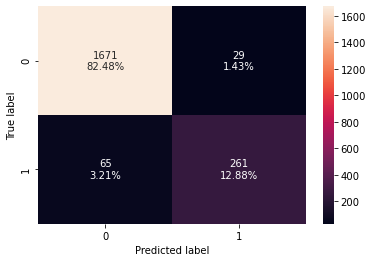

In [116]:
# creating confusion matrix
confusion_matrix_sklearn(bagging, X_val, y_val)

* Bagging has NOT given a generalized performance on training and validation set.
* Model is over fitting 

### Bagging Classifier on oversampled data

In [115]:
bagging_over = BaggingClassifier(random_state=1)

# Training the basic Decision Tree  model with training set
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

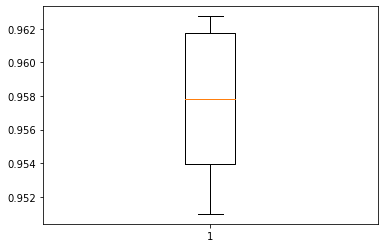

In [117]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.95 to 0.962, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [118]:
# Calculating different metrics on train set
bagging_over_train_perf = model_performance_classification_sklearn(
    bagging_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.997549  0.996862   0.998233  0.997547

In [119]:
# Calculating different metrics on validation set
bagging_over_val_perf = model_performance_classification_sklearn(
    bagging_over, X_val, y_val
)
print("validation performance:")
bagging_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.947187  0.843558   0.830816  0.837139

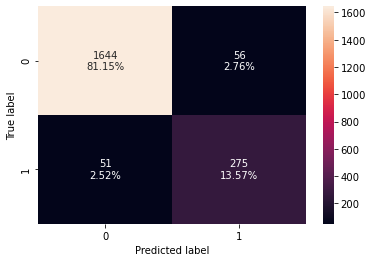

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_over, X_val, y_val)

* Perfrmance does not improve in validation compared to training. The models between Training and Validation is over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [121]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [122]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



###  Bagging Classifier on undersampled data

In [123]:
bagging_under = BaggingClassifier(random_state=1)
bagging_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

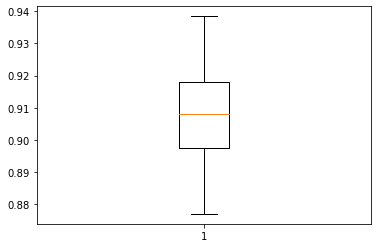

In [124]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=bagging_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.90 to 0.92.
* Let's check the performance on the validation set.

In [125]:
# Calculating different metrics on train set
bagging_under_train_perf = model_performance_classification_sklearn(
    bagging_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.994365  0.989754   0.998966  0.994339

In [126]:
# Calculating different metrics on validation set
bagging_under_val_perf = model_performance_classification_sklearn(
    bagging_under, X_val, y_val
)
print("Validation performance:")
bagging_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.923495  0.923313   0.698376  0.795244

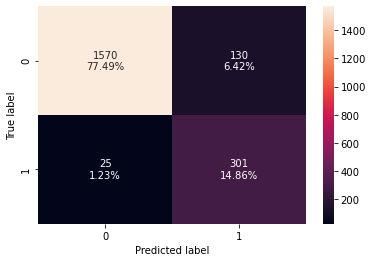

In [127]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_val, y_val)

* Model is a overfit to the training with a lower recall score of less FN than Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_model_train_perf.T,
        bagging_over_train_perf.T,
        bagging_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging Classifier  Bagging Classifier with oversampled data  \
Accuracy             0.997366                                  0.997549   
Recall               0.987705                                  0.996862   
Precision            0.995868                                  0.998233   
F1                   0.991770                                  0.997547   

           Bagging Classifier with undersampled data  
Accuracy                                    0.994365  
Recall                                      0.989754  
Precision                                   0.998966  
F1                                          0.994339

In [129]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_model_val_perf.T,
        bagging_over_val_perf.T,
        bagging_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
   "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Bagging Classifier  Bagging Classifier with oversampled data  \
Accuracy             0.953603                                  0.947187   
Recall               0.800613                                  0.843558   
Precision            0.900000                                  0.830816   
F1                   0.847403                                  0.837139   

           Bagging Classifier with undersampled data  
Accuracy                                    0.923495  
Recall                                      0.923313  
Precision                                   0.698376  
F1                                          0.795244

* Bagging Classifier on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [130]:
# Calculating different metrics on validation set
bagging_under_test_perf = model_performance_classification_sklearn(
    bagging_under, X_test, y_test
)
print("Test performance:")
bagging_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.913129  0.916923   0.666667  0.772021

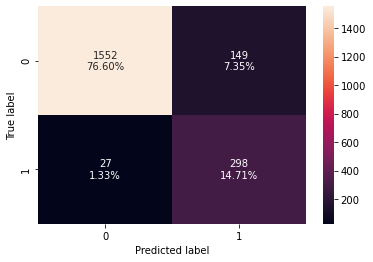

In [131]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set.The RECALL for Test and valudation are ver close and shows that it is generalizing well 

## Random Forest  Classifier

In [136]:
#Fitting the Traiing model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

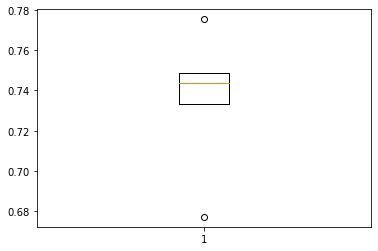

In [137]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=rf, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.74 to 0.76 recall.
* Let's check the performance on validation data.

In [138]:
# Calculating different metrics on train set
rf_model_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)
print("Training performance:")
rf_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [139]:
# Calculating different metrics on validation set
rf_model_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
print("Validation performance:")
rf_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.952616  0.763804   0.929104  0.838384

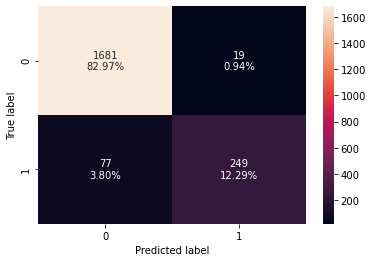

In [142]:
# creating confusion matrix
confusion_matrix_sklearn(rf, X_val, y_val)

* Random Forest has NOT given a generalized performance on training and validation set.
* Model is over fitting 

### Randpm Forest Classifier on oversampled data

In [143]:
rf_over = RandomForestClassifier(random_state=1)

# Training the basic Decision Tree  model with training set
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

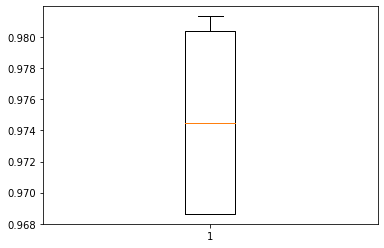

In [144]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=rf_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.968 to 0.98, which is an less from the previous model,but is ok
* Let's check the performance on the validation set.

In [147]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [149]:
# Calculating different metrics on validation set
rf_over_val_perf = model_performance_classification_sklearn(
    rf_over, X_val, y_val
)
print("validation performance:")
rf_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.953603  0.828221   0.876623  0.851735

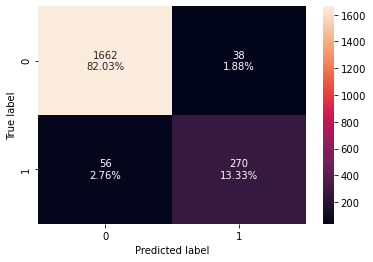

In [150]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over, X_val, y_val)

* Perfrmance does not improve in validation compared to training. The models between Training and Validation is over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [151]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [152]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



###  Random Forest Classifier on undersampled data

In [153]:
rf_under = BaggingClassifier(random_state=1)
rf_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

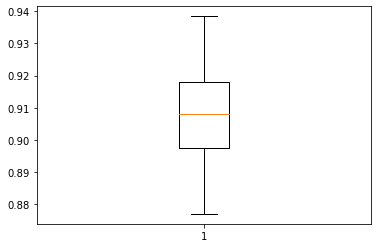

In [155]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=rf_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.90 to 0.92.
* Let's check the performance on the validation set.

In [156]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.994365  0.989754   0.998966  0.994339

In [157]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(
   rf_under, X_val, y_val
)
print("Validation performance:")
rf_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.923495  0.923313   0.698376  0.795244

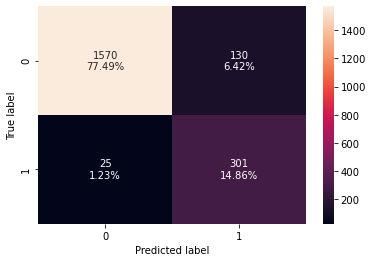

In [158]:
# creating confusion matrix
confusion_matrix_sklearn(rf_under, X_val, y_val)

* Model is a overfit to the training with a lower recall score of less FN than Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [159]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_model_train_perf.T,
        rf_over_train_perf.T,
        rf_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Classifier",
    "Random Forest Classifier with oversampled data",
    "Random Forest Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Random Forest Classifier  \
Accuracy                        1.0   
Recall                          1.0   
Precision                       1.0   
F1                              1.0   

           Random Forest Classifier with oversampled data  \
Accuracy                                              1.0   
Recall                                                1.0   
Precision                                             1.0   
F1                                                    1.0   

           Random Forest Classifier with undersampled data  
Accuracy                                          0.994365  
Recall                                            0.989754  
Precision                                         0.998966  
F1                                                0.994339

In [160]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        rf_model_val_perf.T,
        rf_over_val_perf.T,
        rf_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Classifier",
    "Random Forest Classifier with oversampled data",
    "Random Forest Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Random Forest Classifier  \
Accuracy                   0.952616   
Recall                     0.763804   
Precision                  0.929104   
F1                         0.838384   

           Random Forest Classifier with oversampled data  \
Accuracy                                         0.953603   
Recall                                           0.828221   
Precision                                        0.876623   
F1                                               0.851735   

           Random Forest Classifier with undersampled data  
Accuracy                                          0.923495  
Recall                                            0.923313  
Precision                                         0.698376  
F1                                                0.795244

* Random Forest Classifier on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [161]:
# Calculating different metrics on validation set
rf_under_test_perf = model_performance_classification_sklearn(
    rf_under, X_test, y_test
)
print("Test performance:")
rf_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.913129  0.916923   0.666667  0.772021

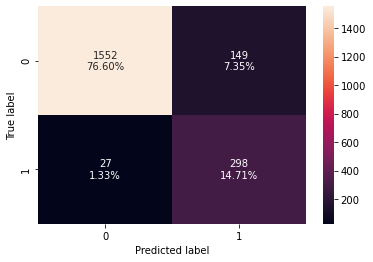

In [162]:
# creating confusion matrix
confusion_matrix_sklearn(rf_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set.The RECALL for Test and valudation are ver close and shows that it is generalizing well 

## XGB Classifier

In [164]:
#Fitting the Traiing model
XGB = XGBClassifier(random_state=1, eval_metric='logloss')
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

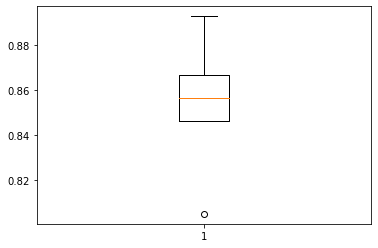

In [165]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=XGB, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.84 to 0.87 recall.Median around 0.86
* Let's check the performance on validation data.

In [166]:
# Calculating different metrics on train set
XGB_model_train_perf = model_performance_classification_sklearn(
    XGB, X_train, y_train
)
print("Training performance:")
XGB_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [167]:
# Calculating different metrics on validation set
XGB_model_val_perf = model_performance_classification_sklearn(XGB, X_val, y_val)
print("Validation performance:")
XGB_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.971372  0.883436   0.935065  0.908517

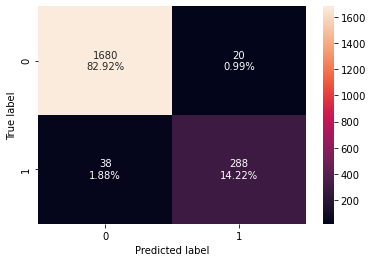

In [168]:
# creating confusion matrix
confusion_matrix_sklearn(XGB, X_val, y_val)

* XGB_model has a CLOSELY generalized performance on training and validation set.
* Model is SLIGHTLY over fitting 

### XGB Classifier on oversampled data

In [169]:
XGB_over = XGBClassifier(random_state=1, eval_metric='logloss')

# Training the basic Decision Tree  model with training set
XGB_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

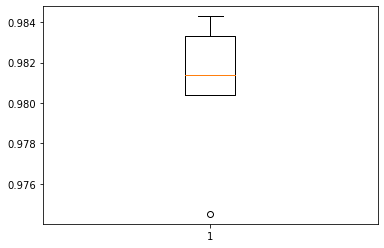

In [170]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=XGB_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.98 to 0.984, which is an less from the previous model,but is ok
* Let's check the performance on the validation set.

In [171]:
# Calculating different metrics on train set
XGB_over_train_perf = model_performance_classification_sklearn(
    XGB_over, X_train_over, y_train_over
)
print("Training performance:")
XGB_over_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [172]:
# Calculating different metrics on validation set
XGB_over_val_perf = model_performance_classification_sklearn(
    XGB_over, X_val, y_val
)
print("validation performance:")
XGB_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.968904  0.898773   0.907121  0.902928

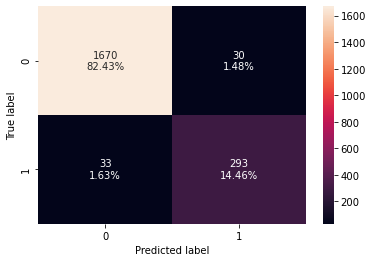

In [173]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_over, X_val, y_val)

* Perfrmance does NOT improve in validation compared to XGB . The models between Training and Validation is over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [179]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [180]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



###  XGB Classifier on undersampled data

In [181]:
XGB_under = XGBClassifier(random_state=1, eval_metric='logloss')
XGB_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

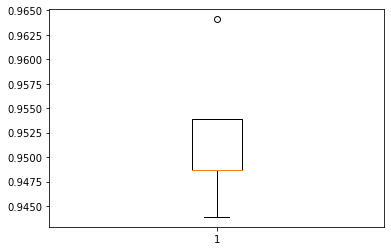

In [182]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=XGB_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.9475 to 0.955.
* Let's check the performance on the validation set.

In [178]:
# Calculating different metrics on train set
XGB_under_train_perf = model_performance_classification_sklearn(
    XGB_under, X_train_un, y_train_un
)
print("Training performance:")
XGB_under_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.994365  0.989754   0.998966  0.994339

In [184]:
# Calculating different metrics on validation set
XGB_under_val_perf = model_performance_classification_sklearn(
   XGB_under, X_val, y_val
)
print("Validation performance:")
XGB_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.937808  0.960123   0.734742  0.832447

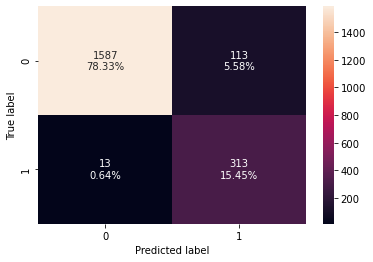

In [185]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_under, X_val, y_val)

* Model is a overfit to the training with a lower recall score of less FN than Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [186]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        XGB_model_train_perf.T,
        XGB_over_train_perf.T,
        XGB_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGB Classifier",
    "XGB Classifier with oversampled data",
    "XGB Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGB Classifier  XGB Classifier with oversampled data  \
Accuracy              1.0                                   1.0   
Recall                1.0                                   1.0   
Precision             1.0                                   1.0   
F1                    1.0                                   1.0   

           XGB Classifier with undersampled data  
Accuracy                                0.994365  
Recall                                  0.989754  
Precision                               0.998966  
F1                                      0.994339

In [187]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        XGB_model_val_perf.T,
        XGB_over_val_perf.T,
        XGB_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGB Classifier",
    "XGB Classifier with oversampled data",
    "XGB Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


XGB Classifier  XGB Classifier with oversampled data  \
Accuracy         0.971372                              0.968904   
Recall           0.883436                              0.898773   
Precision        0.935065                              0.907121   
F1               0.908517                              0.902928   

           XGB Classifier with undersampled data  
Accuracy                                0.937808  
Recall                                  0.960123  
Precision                               0.734742  
F1                                      0.832447

* XGB Classifier on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [188]:
# Calculating different metrics on validation set
XGB_under_test_perf = model_performance_classification_sklearn(
    XGB_under, X_test, y_test
)
print("Test performance:")
XGB_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.931885  0.963077   0.712984  0.819372

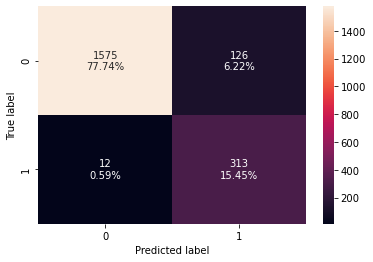

In [189]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set.The RECALL for Test and valudation are very close and shows that it is generalizing well .The FN is also the lowest compared to oversampled and undersampled models

## Gradient Boost Classifier

In [190]:
#Fitting the Traiing model
GB = GradientBoostingClassifier(random_state=1)
GB.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

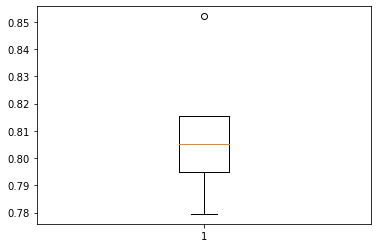

In [191]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=GB, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance of RECALL on training set varies between 0.79 to 0.82.
* Let's check the performance on validation data.

In [192]:
# Calculating different metrics on train set
GB_model_train_perf = model_performance_classification_sklearn(
    GB, X_train, y_train
)
print("Training performance:")
GB_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.972181  0.872951   0.949833  0.90977

In [195]:
# Calculating different metrics on validation set
GB_model_val_perf = model_performance_classification_sklearn(GB, X_val, y_val)
print("Validation performance:")
GB_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.964462  0.834356   0.937931  0.883117

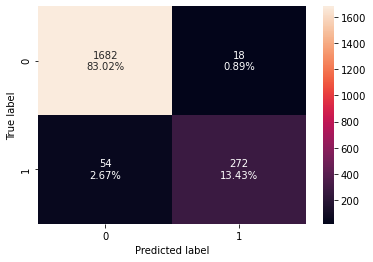

In [194]:
# creating confusion matrix
confusion_matrix_sklearn(GB, X_val, y_val)

* Gradient Boost model has a CLOSELY generalized performance on training and validation set.
* Model is SLIGHTLY over fitting 

### Gradient Boost Classifier on oversampled data

In [196]:
GB_over = GradientBoostingClassifier(random_state=1)

# Training the basic Decision Tree  model with training set
GB_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

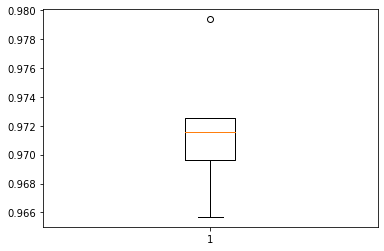

In [198]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=GB_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model RECALL on training set is over 0.97 to 0.973, which is an better from the previous model
* Let's check the performance on the validation set.

In [199]:
# Calculating different metrics on train set
GB_over_train_perf = model_performance_classification_sklearn(
    GB_over, X_train_over, y_train_over
)
print("Training performance:")
GB_over_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.980388  0.980192   0.980577  0.980384

In [200]:
# Calculating different metrics on validation set
GB_over_val_perf = model_performance_classification_sklearn(
    GB_over, X_val, y_val
)
print("validation performance:")
GB_over_val_perf

validation performance:


Accuracy    Recall  Precision        F1
0  0.958539  0.895706   0.853801  0.874251

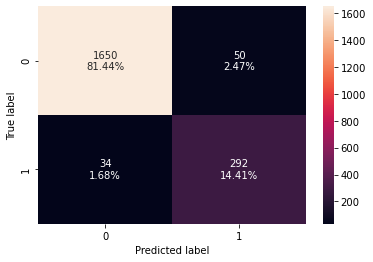

In [202]:
# creating confusion matrix
confusion_matrix_sklearn(GB_over, X_val, y_val)

* Performance has improved in validation compared to GB. The models between Training and Validation are slightly over fitting. 
* Lets try:
  a) Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [203]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [204]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



###  Greadient Boost Classifier on undersampled data

In [205]:
GB_under = GradientBoostingClassifier(random_state=1)
GB_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

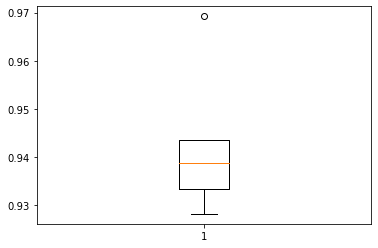

In [206]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=GB_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.93 to 0.945.
* Let's check the performance on the validation set.

In [209]:
# Calculating different metrics on train set
GB_under_train_perf = model_performance_classification_sklearn(
    GB_under, X_train_un, y_train_un
)
print("Training performance:")
GB_under_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.973361  0.980533   0.966667  0.97355

In [208]:
# Calculating different metrics on validation set
GB_under_val_perf = model_performance_classification_sklearn(
   GB_under, X_val, y_val
)
print("Validation performance:")
GB_under_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.933366  0.960123    0.71954  0.822602

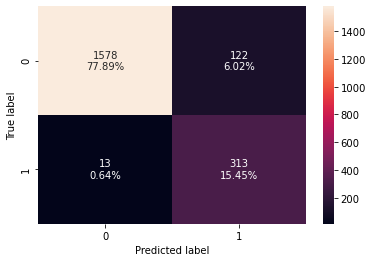

In [210]:
# creating confusion matrix
confusion_matrix_sklearn(GB_under, X_val, y_val)

* Model is a overfit to the training with a lower recall score of less FN than Over Sampling.
* Model RECALL performance has improved using undersampling by F1Score is less. Lets keep checking 

In [212]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GB_model_train_perf.T,
        GB_over_train_perf.T,
        GB_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GB Classifier",
    "GB Classifier with oversampled data",
    "GB Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


GB Classifier  GB Classifier with oversampled data  \
Accuracy        0.972181                             0.980388   
Recall          0.872951                             0.980192   
Precision       0.949833                             0.980577   
F1              0.909770                             0.980384   

           GB Classifier with undersampled data  
Accuracy                               0.973361  
Recall                                 0.980533  
Precision                              0.966667  
F1                                     0.973550

In [213]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        GB_model_val_perf.T,
        GB_over_val_perf.T,
        GB_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GB Classifier",
    "GB Classifier with oversampled data",
    "GB Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


GB Classifier  GB Classifier with oversampled data  \
Accuracy        0.964462                             0.958539   
Recall          0.834356                             0.895706   
Precision       0.937931                             0.853801   
F1              0.883117                             0.874251   

           GB Classifier with undersampled data  
Accuracy                               0.933366  
Recall                                 0.960123  
Precision                              0.719540  
F1                                     0.822602

* Gradient Classifier on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [214]:
# Calculating different metrics on validation set
GB_under_test_perf = model_performance_classification_sklearn(
    GB_under, X_test, y_test
)
print("Test performance:")
GB_under_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.935341  0.972308   0.721461  0.828309

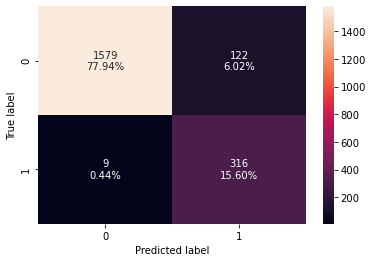

In [215]:
# creating confusion matrix
confusion_matrix_sklearn(GB_under, X_test, y_test)

* Model trained with undersampled data has given generalised performance on the test set
* The RECALL for Test and validation is better the GB_under validation shows that it is generalizing well 
* The FN(RECALL formula)  is also the lowest compared to oversampled and undersampled models

In [218]:
# training performance comparison of ALL models

models_train_comp_df = pd.concat(
    [   log_reg_model_train_perf.T,
        d_tree_model_train_perf.T,
        bagging_model_train_perf.T, 
        rf_model_train_perf.T,
        XGB_model_train_perf.T,
        GB_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Train ",
    "Decision Tree Train",
    "Bagging Classifier Train",
    "Random Forest Classifier Train",
    "XGB Classifier Train",
    "GB Classifier Train" 
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Train   Decision Tree Train  \
Accuracy                     0.869465                  1.0   
Recall                       0.410861                  1.0   
Precision                    0.647819                  1.0   
F1                           0.502821                  1.0   

           Bagging Classifier Train  Random Forest Classifier Train  \
Accuracy                   0.997366                             1.0   
Recall                     0.987705                             1.0   
Precision                  0.995868                             1.0   
F1                         0.991770                             1.0   

           XGB Classifier Train  GB Classifier Train  
Accuracy                    1.0             0.972181  
Recall                      1.0             0.872951  
Precision                   1.0             0.949833  
F1                          1.0             0.909770

In [219]:
# Validation performance comparison

models_train_comp_df = pd.concat(
   [   log_reg_model_val_perf.T,
        d_tree_model_val_perf.T,
        bagging_model_val_perf.T, 
        rf_model_val_perf.T,
        XGB_model_val_perf.T,
        GB_model_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Validation ",
    "Decision Tree Validation",
    "Bagging Classifier Validation",
    "Random Forest Classifier Validation",
    "XGB Classifier Validation",
    "GB Classifier Validation" 
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Logistic Regression Validation   Decision Tree Validation  \
Accuracy                          0.880059                  0.937808   
Recall                            0.475460                  0.791411   
Precision                         0.682819                  0.816456   
F1                                0.560579                  0.803738   

           Bagging Classifier Validation  Random Forest Classifier Validation  \
Accuracy                        0.953603                             0.952616   
Recall                          0.800613                             0.763804   
Precision                       0.900000                             0.929104   
F1                              0.847403                             0.838384   

           XGB Classifier Validation  GB Classifier Validation  
Accuracy                    0.971372                  0.964462  
Recall                      0.883436                  0.834356  
Precision                   0.935065                  0.937931  
F1                          0.908517                  0.883117

In [220]:
# Test performance comparison

models_train_comp_df = pd.concat(
     [  log_reg_under_test_perf.T,
        d_tree_under_test_perf.T,
        bagging_under_test_perf.T, 
        rf_under_test_perf.T,
        XGB_under_test_perf.T,
        GB_under_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Test ",
    "Decision Tree Test",
    "Bagging Classifier Test",
    "Random Forest Classifier Test",
    "XGB Classifier Test",
    "GB Classifier Test" 
]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


Logistic Regression Test   Decision Tree Test  \
Accuracy                    0.752221            0.877098   
Recall                      0.852308            0.923077   
Precision                   0.378933            0.572519   
F1                          0.524621            0.706714   

           Bagging Classifier Test  Random Forest Classifier Test  \
Accuracy                  0.913129                       0.913129   
Recall                    0.916923                       0.916923   
Precision                 0.666667                       0.666667   
F1                        0.772021                       0.772021   

           XGB Classifier Test  GB Classifier Test  
Accuracy              0.931885            0.935341  
Recall                0.963077            0.972308  
Precision             0.712984            0.721461  
F1                    0.819372            0.828309

## Final Model Selection 

* Based on the Validation results the best performance in validation with recall of 0.883436 and F1 of 0.908517 is given by    XGBOost model 
* Based on the Validation results the best performance in validation with recall of 0.972308 and F1 of 0.828309 is given by Gradient Boost Classiifier model 
* The model we will select is Gradient Boost Classiifier model 

### Business Insights and Recommendations


* Between 35-36 months  is the highest and most comonly found customers with 2000+ counts.
* Most Customers have 2 & 3 Contacts_Count_12_mon variable. 
* The Total_Trans_Amt distribution is has many outliers beyound 7500.We will keep the ouliers to check for variance on this feature.
* 53% of the customers are females.
* Dependent Count 3 is the highest followed by 2,1 & 4 amoung customers.
* 30.9% of the customers are graduates followed by 19.9% with high school and 10% with some college  education.
* 46.3% of the customes are married ,followed by 38.9% Single.Majority of the customer are married.
* There is strong correlation between Months_on_book & Customer Age.
* There is strong correlation between Average_Utilization_Ratio &Total Revolving Balance.
* Credit limit  has a negative relation with  Average Utilization Ratio variable .
* Variable Average Utilization Ratio has a negative /inverse relationship with Avg_Open_To_Buy variable. 
* Income Range less than 40K has the highest number of Customers and Attrition customers followed by 40K-60k range.
* Income Range 120K has the lowest number of Customers and Attrition customers.

